# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras`.
You should visit [`keras` webpage](https://keras.io/) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

!pip install tensorflow keras_core

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [3]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [5]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
x_train, x_test, y_train, y_test = prepare_boston()

In [9]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [10]:
input_layer = InputLayer(input_shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 0s - 25ms/step - loss: 0.3560
Epoch 2/10
5/5 - 0s - 5ms/step - loss: 0.2809
Epoch 3/10
5/5 - 0s - 4ms/step - loss: 0.2372
Epoch 4/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 - 0s - 4ms/step - loss: 0.2077
Epoch 5/10
5/5 - 0s - 4ms/step - loss: 0.1935
Epoch 6/10
5/5 - 0s - 4ms/step - loss: 0.1779
Epoch 7/10
5/5 - 0s - 4ms/step - loss: 0.1663
Epoch 8/10
5/5 - 0s - 4ms/step - loss: 0.1569
Epoch 9/10
5/5 - 0s - 7ms/step - loss: 0.1476
Epoch 10/10
5/5 - 0s - 4ms/step - loss: 0.1405


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [11]:
x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(input_shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 - 4s - 6ms/step - accuracy: 0.8420 - loss: 0.6336
Epoch 2/10
600/600 - 4s - 6ms/step - accuracy: 0.9052 - loss: 0.3476
Epoch 3/10
600/600 - 4s - 6ms/step - accuracy: 0.9136 - loss: 0.3104
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9190 - loss: 0.2929
Epoch 5/10
600/600 - 4s - 6ms/step - accuracy: 0.9211 - loss: 0.2822
Epoch 6/10
600/600 - 4s - 6ms/step - accuracy: 0.9233 - loss: 0.2753
Epoch 7/10
600/600 - 4s - 7ms/step - accuracy: 0.9245 - loss: 0.2699
Epoch 8/10
600/600 - 4s - 7ms/step - accuracy: 0.9259 - loss: 0.2652
Epoch 9/10
600/600 - 4s - 6ms/step - accuracy: 0.9272 - loss: 0.2620
Epoch 10/10
600/600 - 4s - 6ms/step - accuracy: 0.9277 - loss: 0.2593


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [12]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - 7ms/step - accuracy: 0.9067 - loss: 0.3353
Epoch 2/10
600/600 - 4s - 7ms/step - accuracy: 0.9549 - loss: 0.1555
Epoch 3/10
600/600 - 4s - 7ms/step - accuracy: 0.9679 - loss: 0.1116
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9749 - loss: 0.0877
Epoch 5/10
600/600 - 4s - 7ms/step - accuracy: 0.9798 - loss: 0.0697
Epoch 6/10
600/600 - 4s - 7ms/step - accuracy: 0.9836 - loss: 0.0575
Epoch 7/10
600/600 - 4s - 7ms/step - accuracy: 0.9859 - loss: 0.0477
Epoch 8/10
600/600 - 4s - 7ms/step - accuracy: 0.9883 - loss: 0.0395
Epoch 9/10
600/600 - 4s - 7ms/step - accuracy: 0.9908 - loss: 0.0324
Epoch 10/10
600/600 - 4s - 7ms/step - accuracy: 0.9929 - loss: 0.0267


In [13]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9161 - loss: 0.2915
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9647 - loss: 0.1170
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9753 - loss: 0.0808
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9818 - loss: 0.0617
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9848 - loss: 0.0484
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9883 - loss: 0.0379
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9900 - loss: 0.0309
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9909 - loss: 0.0268
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9928 - loss: 0.0222
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9936 - loss: 0.0184


In [14]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9199 - loss: 0.2785
Epoch 2/10
600/600 - 5s - 9ms/step - accuracy: 0.9668 - loss: 0.1083
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9757 - loss: 0.0768
Epoch 4/10
600/600 - 5s - 9ms/step - accuracy: 0.9823 - loss: 0.0578
Epoch 5/10
600/600 - 5s - 9ms/step - accuracy: 0.9849 - loss: 0.0466
Epoch 6/10
600/600 - 5s - 9ms/step - accuracy: 0.9887 - loss: 0.0352
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9898 - loss: 0.0301
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9914 - loss: 0.0259
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9923 - loss: 0.0232
Epoch 10/10
600/600 - 5s - 9ms/step - accuracy: 0.9929 - loss: 0.0209


In [15]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,384 (1.54 MB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,590 (1.03 MB)

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [16]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 4s - 7ms/step - accuracy: 0.9138 - loss: 0.3130
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9602 - loss: 0.1404
Epoch 3/10
600/600 - 4s - 7ms/step - accuracy: 0.9721 - loss: 0.0970
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9786 - loss: 0.0727
Epoch 5/10
600/600 - 4s - 7ms/step - accuracy: 0.9831 - loss: 0.0579
Epoch 6/10
600/600 - 4s - 7ms/step - accuracy: 0.9869 - loss: 0.0454
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9891 - loss: 0.0377
Epoch 8/10
600/600 - 4s - 7ms/step - accuracy: 0.9917 - loss: 0.0299
Epoch 9/10
600/600 - 4s - 7ms/step - accuracy: 0.9933 - loss: 0.0249
Epoch 10/10
600/600 - 4s - 7ms/step - accuracy: 0.9951 - loss: 0.0196


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [17]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
420/420 - 5s - 11ms/step - accuracy: 0.9018 - loss: 0.3399 - val_accuracy: 0.9472 - val_loss: 0.1783
Epoch 2/10
420/420 - 5s - 11ms/step - accuracy: 0.9594 - loss: 0.1332 - val_accuracy: 0.9627 - val_loss: 0.1251
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9728 - loss: 0.0883 - val_accuracy: 0.9638 - val_loss: 0.1171
Epoch 4/10
420/420 - 5s - 11ms/step - accuracy: 0.9793 - loss: 0.0664 - val_accuracy: 0.9656 - val_loss: 0.1158
Epoch 5/10
420/420 - 4s - 11ms/step - accuracy: 0.9844 - loss: 0.0492 - val_accuracy: 0.9691 - val_loss: 0.1056
Epoch 6/10
420/420 - 4s - 11ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9707 - val_loss: 0.1066
Epoch 7/10
420/420 - 5s - 11ms/step - accuracy: 0.9894 - loss: 0.0334 - val_accuracy: 0.9709 - val_loss: 0.1089
Epoch 8/10
420/420 - 5s - 11ms/step - accuracy: 0.9910 - loss: 0.0254 - val_accuracy: 0.9676 - val_loss: 0.1277
Epoch 9/10
420/420 - 5s - 11ms/step - accuracy: 0.9923 - loss: 0.0233 - val_accuracy: 0.9724 - val_loss:

In [18]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
420/420 - 4s - 9ms/step - accuracy: 0.8975 - loss: 0.3666 - val_accuracy: 0.9377 - val_loss: 0.2204
Epoch 2/10
420/420 - 4s - 9ms/step - accuracy: 0.9510 - loss: 0.1707 - val_accuracy: 0.9541 - val_loss: 0.1574
Epoch 3/10
420/420 - 4s - 9ms/step - accuracy: 0.9658 - loss: 0.1204 - val_accuracy: 0.9616 - val_loss: 0.1313
Epoch 4/10
420/420 - 4s - 9ms/step - accuracy: 0.9744 - loss: 0.0897 - val_accuracy: 0.9648 - val_loss: 0.1164
Epoch 5/10
420/420 - 4s - 8ms/step - accuracy: 0.9808 - loss: 0.0695 - val_accuracy: 0.9664 - val_loss: 0.1150
Epoch 6/10
420/420 - 4s - 9ms/step - accuracy: 0.9846 - loss: 0.0554 - val_accuracy: 0.9711 - val_loss: 0.0989
Epoch 7/10
420/420 - 4s - 8ms/step - accuracy: 0.9867 - loss: 0.0461 - val_accuracy: 0.9693 - val_loss: 0.1087
Epoch 8/10
420/420 - 4s - 9ms/step - accuracy: 0.9902 - loss: 0.0372 - val_accuracy: 0.9677 - val_loss: 0.1090
Epoch 9/10
420/420 - 4s - 9ms/step - accuracy: 0.9914 - loss: 0.0299 - val_accuracy: 0.9703 - val_loss: 0

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [19]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 9ms/step - accuracy: 0.8992 - loss: 0.3500 - val_accuracy: 0.9441 - val_loss: 0.1895
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9585 - loss: 0.1405 - val_accuracy: 0.9598 - val_loss: 0.1349
Epoch 3/10
420/420 - 4s - 9ms/step - accuracy: 0.9709 - loss: 0.0976 - val_accuracy: 0.9651 - val_loss: 0.1170
Epoch 4/10
420/420 - 4s - 9ms/step - accuracy: 0.9787 - loss: 0.0699 - val_accuracy: 0.9693 - val_loss: 0.1017
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9682 - val_loss: 0.1082
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9699 - val_loss: 0.1046
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9898 - loss: 0.0336 - val_accuracy: 0.9711 - val_loss: 0.1033
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9719 - val_loss: 0.1031
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9934 - loss: 0.0223 - val_accuracy: 0.9622 - val_loss: 0.

In [20]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 3s - 7ms/step - accuracy: 0.6478 - loss: 1.3705 - val_accuracy: 0.8469 - val_loss: 0.6660
Epoch 2/10
420/420 - 3s - 7ms/step - accuracy: 0.8656 - loss: 0.5363 - val_accuracy: 0.8867 - val_loss: 0.4319
Epoch 3/10
420/420 - 3s - 7ms/step - accuracy: 0.8894 - loss: 0.4083 - val_accuracy: 0.8967 - val_loss: 0.3694
Epoch 4/10
420/420 - 3s - 8ms/step - accuracy: 0.9002 - loss: 0.3593 - val_accuracy: 0.9032 - val_loss: 0.3370
Epoch 5/10
420/420 - 3s - 8ms/step - accuracy: 0.9073 - loss: 0.3300 - val_accuracy: 0.9077 - val_loss: 0.3172
Epoch 6/10
420/420 - 3s - 7ms/step - accuracy: 0.9119 - loss: 0.3092 - val_accuracy: 0.9117 - val_loss: 0.2998
Epoch 7/10
420/420 - 3s - 7ms/step - accuracy: 0.9172 - loss: 0.2925 - val_accuracy: 0.9174 - val_loss: 0.2885
Epoch 8/10
420/420 - 3s - 7ms/step - accuracy: 0.9210 - loss: 0.2783 - val_accuracy: 0.9209 - val_loss: 0.2758
Epoch 9/10
420/420 - 3s - 8ms/step - accuracy: 0.9245 - loss: 0.2662 - val_accuracy: 0.9233 - val_loss: 0.2674
E

In [21]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.8966 - loss: 0.3595 - val_accuracy: 0.9449 - val_loss: 0.1866
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9570 - loss: 0.1484 - val_accuracy: 0.9581 - val_loss: 0.1415
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9690 - loss: 0.1039 - val_accuracy: 0.9643 - val_loss: 0.1156
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9767 - loss: 0.0774 - val_accuracy: 0.9650 - val_loss: 0.1120
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9817 - loss: 0.0601 - val_accuracy: 0.9691 - val_loss: 0.1036
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.9685 - val_loss: 0.1073
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9703 - val_loss: 0.1082
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9899 - loss: 0.0308 - val_accuracy: 0.9720 - val_loss: 0.1059
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9748 - val_loss:

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [22]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.7558 - loss: 1.0142 - val_accuracy: 0.8877 - val_loss: 0.4320
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9013 - loss: 0.3652 - val_accuracy: 0.9122 - val_loss: 0.3112
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9204 - loss: 0.2861 - val_accuracy: 0.9231 - val_loss: 0.2664
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9315 - loss: 0.2455 - val_accuracy: 0.9319 - val_loss: 0.2388
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9397 - loss: 0.2174 - val_accuracy: 0.9388 - val_loss: 0.2151
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9459 - loss: 0.1954 - val_accuracy: 0.9433 - val_loss: 0.2005
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9497 - loss: 0.1776 - val_accuracy: 0.9457 - val_loss: 0.1877
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9537 - loss: 0.1633 - val_accuracy: 0.9498 - val_loss: 0.1754
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9579 - loss: 0.1498 - val_accuracy: 0.9522 - val_loss:

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [23]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.9001 - loss: 0.3536 - val_accuracy: 0.9418 - val_loss: 0.1918
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9595 - loss: 0.1383 - val_accuracy: 0.9589 - val_loss: 0.1389
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9715 - loss: 0.0962 - val_accuracy: 0.9654 - val_loss: 0.1212
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9772 - loss: 0.0738 - val_accuracy: 0.9658 - val_loss: 0.1151
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9824 - loss: 0.0557 - val_accuracy: 0.9681 - val_loss: 0.1110
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9876 - loss: 0.0418 - val_accuracy: 0.9716 - val_loss: 0.1023
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9721 - val_loss: 0.1012
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9714 - val_loss: 0.1093
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9737 - val_loss:

In [24]:
h.history

{'accuracy': [0.9000714421272278,
  0.9595000147819519,
  0.9715476036071777,
  0.9772142767906189,
  0.9823571443557739,
  0.9875714182853699,
  0.9896666407585144,
  0.9914523959159851,
  0.9927380681037903,
  0.9950714111328125],
 'loss': [0.3535824716091156,
  0.13828957080841064,
  0.09620407968759537,
  0.07375537604093552,
  0.05570809543132782,
  0.041771069169044495,
  0.03327703848481178,
  0.02674015238881111,
  0.023312589153647423,
  0.016157276928424835],
 'val_accuracy': [0.941777765750885,
  0.9589444398880005,
  0.9654444456100464,
  0.965833306312561,
  0.9681110978126526,
  0.9716110825538635,
  0.9720555543899536,
  0.9714444279670715,
  0.9736666679382324,
  0.972777783870697],
 'val_loss': [0.1917736530303955,
  0.13888712227344513,
  0.12118659168481827,
  0.11511295288801193,
  0.11100152134895325,
  0.10234344005584717,
  0.10124167799949646,
  0.1093091070652008,
  0.10364564508199692,
  0.1145339086651802]}

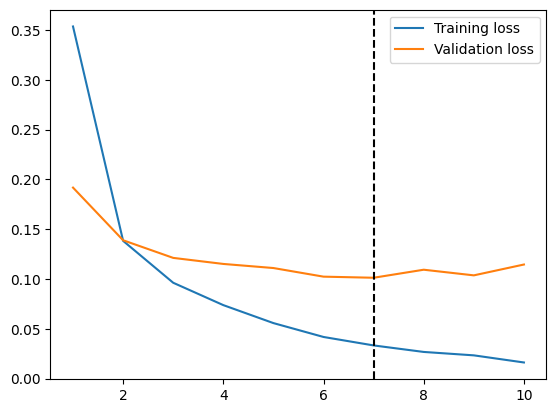

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.keras` on your project. Only record models if validation loss is lower than for all previous models.

In [26]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.keras", save_best_only=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 - 8s - 14ms/step - accuracy: 0.9146 - loss: 0.3006 - val_accuracy: 0.9588 - val_loss: 0.1377
Epoch 2/10
600/600 - 5s - 9ms/step - accuracy: 0.9640 - loss: 0.1194 - val_accuracy: 0.9669 - val_loss: 0.1069
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9746 - loss: 0.0821 - val_accuracy: 0.9718 - val_loss: 0.0908
Epoch 4/10
600/600 - 6s - 9ms/step - accuracy: 0.9810 - loss: 0.0611 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 5/10
600/600 - 6s - 9ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.9784 - val_loss: 0.0775
Epoch 6/10
600/600 - 5s - 9ms/step - accuracy: 0.9888 - loss: 0.0373 - val_accuracy: 0.9784 - val_loss: 0.0725
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9759 - val_loss: 0.0788
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9767 - val_loss: 0.0837
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9926 - loss: 0.0222 - val_accuracy: 0.9767 - val_loss: 0.0824
Epoch 10/10

Use the code below to check that a model has been saved:

In [27]:
%ls -alh "model.keras"

-rw-r--r--@ 1 rtavenar  staff   1.4M Oct 24 17:44 model.keras


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9721 - loss: 0.1064


[0.0910952240228653, 0.9761000275611877]

In [30]:
new_model = keras.models.load_model("model.keras")
new_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9752 - loss: 0.0818


[0.07248483598232269, 0.9783999919891357]

## Regularization

**Question #11.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [31]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 - 5s - 9ms/step - accuracy: 0.9165 - loss: 0.2929 - val_accuracy: 0.9530 - val_loss: 0.1619
Epoch 2/100
600/600 - 5s - 9ms/step - accuracy: 0.9657 - loss: 0.1165 - val_accuracy: 0.9704 - val_loss: 0.1003
Epoch 3/100
600/600 - 6s - 9ms/step - accuracy: 0.9761 - loss: 0.0796 - val_accuracy: 0.9737 - val_loss: 0.0870
Epoch 4/100
600/600 - 5s - 9ms/step - accuracy: 0.9818 - loss: 0.0590 - val_accuracy: 0.9743 - val_loss: 0.0783
Epoch 5/100
600/600 - 5s - 9ms/step - accuracy: 0.9859 - loss: 0.0462 - val_accuracy: 0.9779 - val_loss: 0.0764
Epoch 6/100
600/600 - 5s - 9ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9761 - val_loss: 0.0771
Epoch 7/100
600/600 - 5s - 9ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9787 - val_loss: 0.0746
Epoch 8/100
600/600 - 5s - 9ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9792 - val_loss: 0.0750
Epoch 9/100
600/600 - 5s - 9ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9772 - val_loss: 0.0895
Epoc

In [32]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9756 - loss: 0.0866


[0.07455960661172867, 0.9786999821662903]